In [186]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import svm,preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import f1_score
from scipy.optimize import least_squares
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from random import randint
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr

df=pd.read_csv('qog_bas_ts_jan20.csv')
test=df.drop(['cname','ccodealp','cname_year','ccodealp_year','version'],1)
mask = test.applymap(lambda x: isinstance(x, (int, float)))
test_a=test.where(mask)
imputer = KNNImputer(n_neighbors=2, weights="uniform")
test_a=imputer.fit_transform(test_a)
test_b=pd.DataFrame(test_a)
sets=[]
for x in mask.columns:
    sets.append(len(set(mask[x].value_counts())))
f=pd.DataFrame([sets,mask.columns]).transpose()
test_b.columns=[x for x in test.columns if x not in [*f[f[0]==2][1]]]
test_b.to_csv('knn_qog_jan20.csv')

In [ ]:
test_b=pd.read_csv('knn_qog_jan20.csv')

In [69]:
test_b=test_b.drop(['ccode','ccodecow','ccodewb'],1)

In [180]:
y=test_b['fh_fog']
X=test_b.drop('fh_fog',1)

In [181]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

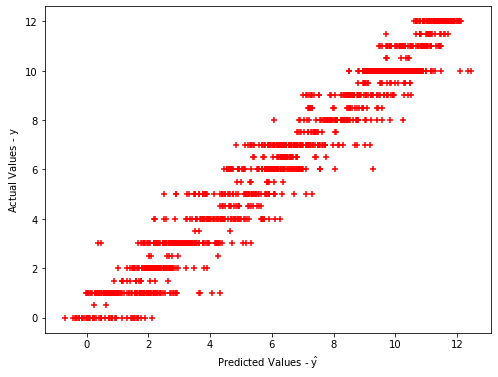

In [182]:
 # Note the difference in argument order
# optionally, you can chain "fit()" to the model object
model = sm.OLS(y_train, X_train)
model = model.fit()
predictions = model.predict(X_test)

# Plot the model
plt.figure(figsize=(8,6))
plt.scatter(predictions, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values - $y$")
plt.show()

In [183]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 fh_fog   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     2199.
Date:                Fri, 08 May 2020   Prob (F-statistic):               0.00
Time:                        16:16:17   Log-Likelihood:                -6659.3
No. Observations:               10461   AIC:                         1.384e+04
Df Residuals:                   10198   BIC:                         1.575e+04
Df Model:                         262                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
year                       0.0008      0.000      2.330      0.020       0.000       0.001
ajr_settmort              -0.0155      0.006     -2.700      0.007      -0.027      -0.004
arda_bagenpct             -4.8056      1.605     -2.994      0.003      -7.951      -1.660
arda_bugenpct             -0.0411      0.078     -0.523      0.601      -0.195       0.113
arda_chgenpct             -0.1578      0.063     -2.523      0.012      -0.280      -0.035
arda_cogenpct             -1.1436      0.666     -1.718      0.086      -2.448       0.161
arda_higenpct             -0.0036      0.095     -0.038      0.970      -0.190       0.183
arda_isgenpct             -0.1740      0.062     -2.799      0.005      -0.296      -0.052
arda_jagenpct            137.3273     37.148      3.697      0.000      64.509     210.146
arda_jdgenpct              0.2612      0.125      2.084      0.037       0.016       0.507
arda_norelpct             -0.2751      0.115     -2.397      0.017      -0.500      -0.050
arda_otgenpct              0.4333      0.212      2.045      0.041       0.018       0.849
arda_shgenpct             -0.2703      0.074     -3.641      0.000      -0.416      -0.125
arda_sigenpct            -31.2037      6.728     -4.638      0.000     -44.391     -18.016
arda_sygenpct              0.3012      0.098      3.083      0.002       0.110       0.493
arda_tagenpct             -2.6026      0.579     -4.495      0.000      -3.737      -1.468
arda_zogenpct             25.8279     27.755      0.931      0.352     -28.577      80.233
atop_ally                  0.6036      0.267      2.265      0.024       0.081       1.126
atop_number                0.0020      0.002      1.079      0.281      -0.002       0.006
bci_bci                   -0.0041      0.001     -5.084      0.000      -0.006      -0.002
bicc_gmi                2.189e-06   4.87e-05      0.045      0.964   -9.33e-05    9.77e-05
biu_offrel                 0.0361      0.011      3.312      0.001       0.015       0.058
bl_asyf                   -0.1980      0.092     -2.148      0.032      -0.379      -0.017
bl_asym                   -0.2400      0.088     -2.719      0.007      -0.413      -0.067
bl_asymf                   0.4345      0.179      2.426      0.015       0.083       0.786
bmr_dem                   -0.0973      0.028     -3.513      0.000      -0.152      -0.043
bmr_demdur                -0.0009      0.000     -5.866      0.000      -0.001      -0.001
cai_cai2                   0.0682      0.024      2.830      0.005       0.021       0.115
cbi_cbiu                   0.0413      0.127      0.327      0.744      -0.207       0.289
cbi_cbiw                  -0.0389      0.122     -0.319      0.749      -0.278       0.200
ccp_cc                     0.0018      0.001      3.159      0.002       0.001  

In [81]:
clf = RandomForestRegressor(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("Accuracy on test data: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy on test data: 0.99


ValueError: Dimensions of labels and X must be compatible

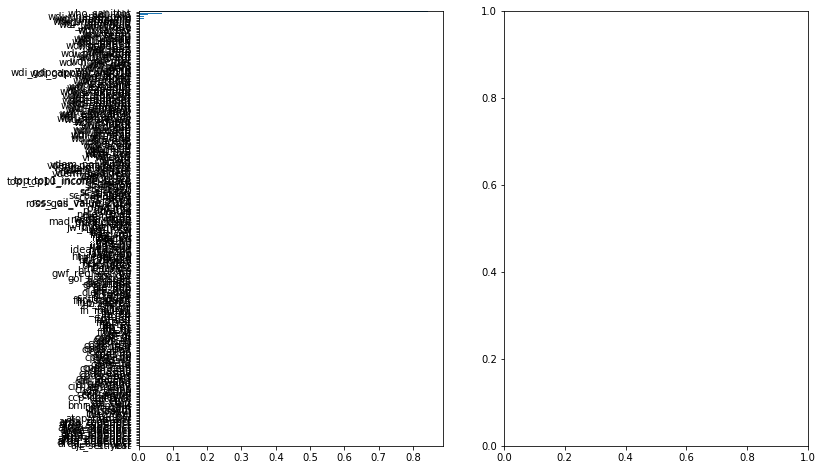

In [84]:
result = permutation_importance(clf, X_train, y_train, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices,
         clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(test_b.columns)
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(clf.feature_importances_)))
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=test_b.columns)
fig.tight_layout()
plt.show()

In [87]:
dict(zip(test_b.columns,clf.feature_importances_[tree_importance_sorted_idx]))

{'year': 0.0,
 'ajr_settmort': 0.0,
 'arda_bagenpct': 5.977365273617965e-08,
 'arda_bugenpct': 6.58368158381357e-08,
 'arda_chgenpct': 7.60977484010733e-08,
 'arda_cogenpct': 1.6383315029007201e-07,
 'arda_higenpct': 9.442334407624553e-07,
 'arda_isgenpct': 1.0937571835726671e-06,
 'arda_jagenpct': 1.4240721034102862e-06,
 'arda_jdgenpct': 1.4670585110307372e-06,
 'arda_norelpct': 1.5612094711302886e-06,
 'arda_otgenpct': 1.5735122035705768e-06,
 'arda_shgenpct': 2.454439026334102e-06,
 'arda_sigenpct': 2.731997294470531e-06,
 'arda_sygenpct': 2.9827814543763244e-06,
 'arda_tagenpct': 3.000485453005648e-06,
 'arda_zogenpct': 3.07126784551236e-06,
 'atop_ally': 3.4193293597061636e-06,
 'atop_number': 3.5986342485430323e-06,
 'bci_bci': 3.777324071979156e-06,
 'bicc_gmi': 3.7826146636845394e-06,
 'biu_offrel': 3.810989419214689e-06,
 'bl_asyf': 4.0739989334627465e-06,
 'bl_asym': 4.119479173201905e-06,
 'bl_asymf': 4.164364059205218e-06,
 'bmr_dem': 4.43440280554173e-06,
 'bmr_demdur': 4

In [95]:
def RFRegressor(y, df):
    X = df.drop([y], 1)
    y = df[y]
    from sklearn.ensemble import RandomForestRegressor
    rf = RandomForestRegressor()
    rf.fit(X, y)
    names = X.dtypes.index
    print("Features sorted by their score:")
    print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
                 reverse=True))

In [96]:
RFRegressor('fh_fog',test_b)

Features sorted by their score:
[(0.844, 'fh_aor'), (0.073, 'fh_pr'), (0.0275, 'fh_rol'), (0.0159, 'fh_pair'), (0.0149, 'fh_ep'), (0.0032, 'wbgi_rle'), (0.0017, 'wbgi_gee'), (0.0013, 'wbgi_cce'), (0.0012, 'fh_feb'), (0.0008, 'fh_status'), (0.0005, 'wdi_fdiin'), (0.0004, 'ffp_sl'), (0.0003, 'wdi_tele'), (0.0003, 'wdi_afp'), (0.0003, 'wbgi_pve'), (0.0003, 'fh_ipolity2'), (0.0003, 'ffp_ued'), (0.0003, 'bicc_gmi'), (0.0002, 'wdi_unempymilo'), (0.0002, 'wdi_tacpsr'), (0.0002, 'wdi_refori'), (0.0002, 'wdi_popden'), (0.0002, 'wdi_pop65'), (0.0002, 'wdi_pop14'), (0.0002, 'wdi_pop'), (0.0002, 'wdi_homicides'), (0.0002, 'wdi_expmil'), (0.0002, 'wdi_empindf'), (0.0002, 'wdi_emp'), (0.0002, 'wdi_eduprp'), (0.0002, 'vdem_corr'), (0.0002, 'lp_lat_abst'), (0.0002, 'hf_labor'), (0.0002, 'gpi_gpi'), (0.0002, 'fhp_score5'), (0.0002, 'ffp_fsi'), (0.0002, 'ffp_ext'), (0.0002, 'bci_bci'), (0.0001, 'year'), (0.0001, 'wdi_wip'), (0.0001, 'wdi_unempyilo'), (0.0001, 'wdi_unempyfilo'), (0.0001, 'wdi_unempmilo')

In [102]:
df.dropna(subset=['fh_fog'])['year'].value_counts()

2017    194
2015    194
2013    194
2011    194
2018    194
2016    194
2014    194
2012    194
2009    193
2007    193
2010    193
2008    193
2006    193
2005    192
Name: year, dtype: int64

In [107]:
RFRegressor('fh_ipolity2',test_b.drop(['fh_pr','fh_cl','fh_status'],1))

Features sorted by their score:
[(0.3891, 'ht_regtype'), (0.1014, 'vdem_libdem'), (0.0933, 'year'), (0.086, 'wbgi_rle'), (0.04, 'fh_fog'), (0.0338, 'fi_index'), (0.0336, 'p_polity2'), (0.0276, 'fh_ep'), (0.0156, 'ciri_assn'), (0.0133, 'vdem_polyarchy'), (0.012, 'wdi_pop'), (0.0098, 'fh_aor'), (0.0074, 'fh_feb'), (0.0054, 'ciri_formov'), (0.0053, 'vdem_mecorrpt'), (0.0052, 'bci_bci'), (0.004, 'vdem_corr'), (0.0039, 'ht_region'), (0.0038, 'iiag_he'), (0.0037, 'wdi_area'), (0.0036, 'bmr_dem'), (0.0033, 'vdem_egaldem'), (0.0032, 'vdem_partipdem'), (0.0031, 'van_index'), (0.0026, 'vdem_delibdem'), (0.0025, 'ht_regtype1'), (0.0024, 'wdi_expmil'), (0.0022, 'wbgi_gee'), (0.0022, 'gle_cgdpc'), (0.002, 'chga_demo'), (0.0018, 'wdi_gdpcapcon2010'), (0.0018, 'wbgi_cce'), (0.0018, 'gle_rgdpc'), (0.0017, 'wdi_gdpind'), (0.0015, 'wdi_internet'), (0.0014, 'ross_oil_value_2014'), (0.0014, 'gpi_gpi'), (0.0014, 'diat_ti'), (0.0013, 'rsf_pfi'), (0.0012, 'pwt_pop'), (0.0012, 'gol_enep'), (0.0012, 'gle_gdp')

In [106]:
correlations=test_b.corr()

In [108]:
type(correlations)

pandas.core.frame.DataFrame

In [168]:
def simplify(df):
    correlations=df.corr()
    corr=pd.DataFrame(np.sort(correlations.values)[:,-4], index=correlations.index).drop_duplicates(0)
    corr=corr.sort_values(0).drop_duplicates()
    corr=corr[corr[0]<0.9]
    targets=corr.index
    df=df[targets]
    return df

In [169]:
test_c=simplify(test_b)
test_d=simplify(test_c)
test_e=simplify(test_d)
test_f=simplify(test_e)
test_g=simplify(test_f)
test_h=simplify(test_g)

In [170]:
test_h

cpds_lnl  cpds_lreg  ccp_equal  cpds_lfe  arda_jdgenpct  ccp_cc  \
0           0.0        0.0        1.0       0.0       0.000000     2.0   
1           0.0        0.0        1.0       0.0       0.000000     2.0   
2           0.0        0.0        1.0       0.0       0.000000     2.0   
3           0.0        0.0        1.0       0.0       0.000000     2.0   
4           0.0        0.0        1.0       0.0       0.000099     2.0   
...         ...        ...        ...       ...            ...     ...   
15609       0.0        0.0        1.0       0.0       0.010249     2.0   
15610       0.0        0.0        1.0       0.0       0.010249     2.0   
15611       0.0        0.0        1.0       0.0       0.010249     2.0   
15612       0.0        0.0        1.0       0.0       0.010249     2.0   
15613       0.0        0.0        1.0       0.0       0.005999     2.0   

       arda_tagenpct  ccp_freerel  ccp_childwrk  ccp_strike  ...    gle_cgdpc  \
0           0.000000          1.0           2.0         3.0  ...   1200.27000   
1           0.000000          1.0           2.0         3.0  ...   1200.27000   
2           0.000000          1.0           2.0         3.0  ...   4222.41515   
3           0.000000          1.0           2.0         3.0  ...   4222.41515   
4           0.000000          1.0           2.0         3.0  ...    130.82001   
...              ...          ...           ...         ...  ...          ...   
15609       0.000099          1.0           1.5         2.5  ...  36210.12900   
15610       0.000099          1.0           1.5         2.5  ...  36210.12900   
15611       0.000099          1.0           1.5         2.5  ...  36210.12900   
15612       0.000099          1.0           1.5         2.5  ...  36210.12900   
15613       0.000049          2.0           2.0         1.0  ...   5220.70995   

       diat_ti   wdi_nerp  wdi_pop65  undp_hdi   pwt_hci    wdi_gers  \
0         31.0  72.985149   3.615752    0.5820  1.207166   15.494300   
1         31.0  72.985149   3.615752    0.5820  1.207166   15.494300   
2         41.0  92.634960   4.744360    0.6790  1.937888   75.805925   
3         41.0  92.634960   4.744360    0.6790  1.937888   75.805925   
4         39.5  96.996765   2.569589    0.6720  2.270005   78.000520   
...        ...        ...        ...       ...       ...         ...   
15609     77.5  99.441990   7.726778    0.7175  2.505038  101.647340   
15610     77.5  99.441990   7.726778    0.7175  2.505038  101.647340   
15611     77.5  99.441990   7.726778    0.7175  2.505038  101.647340   
15612     77.5  99.441990   7.726778    0.7175  2.505038  101.647340   
15613     38.5  96.421945   5.324632    0.7215  2.033826   84.964105   

          ef_ef   wdi_tele  van_index  
0      1.028665   0.799886   0.000000  
1      1.028665   0.799886   0.000000  
2      1.785381   7.025796   0.000000  
3      1.785381   7.025796   0.000000  
4      4.501949   0.335507   0.000000  
...         ...        ...        ...  
15609  5.275928  28.626293  16.413856  
15610  5.275928  28.626293  16.413856  
15611  5.275928  28.626293  16.413856  
15612  5.275928  28.626293  16.413856  
15613  2.093801   8.662731  10.400000  

[15614 rows x 147 columns]

In [172]:
RFRegressor('fh_fog',test_h)

KeyError: "['fh_fog'] not found in axis"

In [174]:
set([*test_h.columns])

{'ajr_settmort',
 'arda_bagenpct',
 'arda_bugenpct',
 'arda_chgenpct',
 'arda_cogenpct',
 'arda_higenpct',
 'arda_isgenpct',
 'arda_jagenpct',
 'arda_jdgenpct',
 'arda_norelpct',
 'arda_otgenpct',
 'arda_sigenpct',
 'arda_sygenpct',
 'arda_tagenpct',
 'arda_zogenpct',
 'atop_number',
 'bci_bci',
 'bicc_gmi',
 'bmr_demdur',
 'cai_cai2',
 'ccp_cc',
 'ccp_childwrk',
 'ccp_equal',
 'ccp_freerel',
 'ccp_slave',
 'ccp_strike',
 'ciri_dommov',
 'ciri_injud',
 'ciri_tort',
 'cpds_la',
 'cpds_lall',
 'cpds_lcom',
 'cpds_lcon',
 'cpds_lfe',
 'cpds_lg',
 'cpds_ll',
 'cpds_lls',
 'cpds_lnl',
 'cpds_lo',
 'cpds_lp',
 'cpds_lpen',
 'cpds_lr',
 'cpds_lreg',
 'cpds_lrel',
 'cpds_tg',
 'cpds_vt',
 'diat_ti',
 'ef_ef',
 'ffp_ued',
 'fh_ipolity2',
 'gd_ptsa',
 'gii_gii',
 'gle_cgdpc',
 'gle_gdp',
 'gle_pop',
 'gol_enep',
 'gol_pr',
 'gwf_regimetype',
 'hf_efiscore',
 'hf_financ',
 'hf_invest',
 'hf_labor',
 'hrv_index',
 'ht_colonial',
 'ht_region',
 'iaep_bp',
 'iaep_osp',
 'icrg_qog',
 'ideavt_legvt',


In [175]:
RFRegressor('bci_bci',test_h)

Features sorted by their score:
[(0.408, 'wbgi_pve'), (0.1639, 'icrg_qog'), (0.0709, 'mad_gdppc'), (0.0507, 'ef_ef'), (0.0497, 'vdem_corr'), (0.0225, 'wdi_area'), (0.0204, 'year'), (0.0132, 'p_polity2'), (0.0117, 'top_top10_income_share'), (0.0111, 'undp_hdi'), (0.0095, 'hf_efiscore'), (0.0076, 'ffp_ued'), (0.007, 'wdi_emp'), (0.0053, 'wdi_popden'), (0.005, 'wdi_pop65'), (0.0047, 'ajr_settmort'), (0.0045, 'wdi_empindf'), (0.0043, 'wdi_tele'), (0.0037, 'wdi_popurb'), (0.0037, 'wdi_lfpf'), (0.0034, 'wdi_poprul'), (0.0034, 'wdi_elerenew'), (0.0033, 'pwt_pop'), (0.0031, 'pwt_hci'), (0.003, 'hf_labor'), (0.0029, 'wdi_refasy'), (0.0028, 'wdi_araland'), (0.0025, 'fh_ipolity2'), (0.0023, 'wdi_forest'), (0.0023, 'ht_region'), (0.0022, 'wdi_empind'), (0.0022, 'wdi_broadb'), (0.0022, 'wdi_afp'), (0.0022, 'p_durable'), (0.0021, 'wdi_trade'), (0.0021, 'gol_enep'), (0.0019, 'lp_lat_abst'), (0.0019, 'gle_pop'), (0.0017, 'wdi_homicides'), (0.0016, 'wdi_gdpind'), (0.0016, 'wdi_ane'), (0.0016, 'sc_pgen'

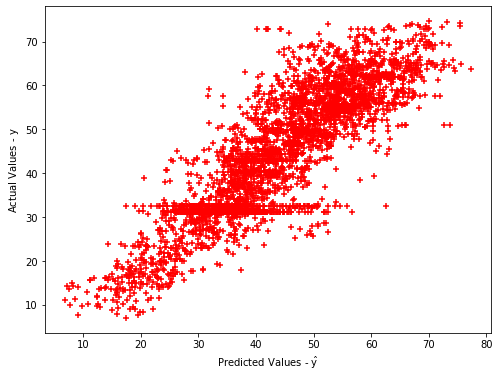

In [176]:
y=test_b['bci_bci']
X=test_b.drop('bci_bci',1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)
 # Note the difference in argument order
# optionally, you can chain "fit()" to the model object
model = sm.OLS(y_train, X_train)
model = model.fit()
predictions = model.predict(X_test)

# Plot the model
plt.figure(figsize=(8,6))
plt.scatter(predictions, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values - $y$")
plt.show()

In [177]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                bci_bci   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     182.6
Date:                Fri, 08 May 2020   Prob (F-statistic):               0.00
Time:                        16:11:15   Log-Likelihood:                -32852.
No. Observations:               10461   AIC:                         6.623e+04
Df Residuals:                   10198   BIC:                         6.814e+04
Df Model:                         262                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
year                       0.0081      0.004      1.914      0.056      -0.000       0.016
ajr_settmort               0.3288      0.070      4.694      0.000       0.192       0.466
arda_bagenpct             50.5233     20.201      2.501      0.012      10.926      90.120
arda_bugenpct             -1.9733      0.960     -2.055      0.040      -3.855      -0.091
arda_chgenpct             -1.1977      0.771     -1.553      0.120      -2.709       0.314
arda_cogenpct             20.8571      7.902      2.640      0.008       5.368      36.346
arda_higenpct             -2.8022      1.168     -2.399      0.016      -5.092      -0.513
arda_isgenpct             -1.7043      0.766     -2.224      0.026      -3.206      -0.202
arda_jagenpct            445.7336    433.302      1.029      0.304    -403.623    1295.090
arda_jdgenpct             -1.9400      1.598     -1.214      0.225      -5.073       1.193
arda_norelpct              0.5661      1.370      0.413      0.680      -2.120       3.252
arda_otgenpct              0.4490      2.562      0.175      0.861      -4.572       5.470
arda_shgenpct             -0.4065      0.896     -0.454      0.650      -2.163       1.350
arda_sigenpct             39.0554     78.183      0.500      0.617    -114.199     192.310
arda_sygenpct             -2.4618      1.156     -2.130      0.033      -4.727      -0.196
arda_tagenpct             19.2107      6.878      2.793      0.005       5.729      32.693
arda_zogenpct           -144.6634    360.110     -0.402      0.688    -850.549     561.222
atop_ally                -19.5044     15.008     -1.300      0.194     -48.923       9.914
atop_number                0.0546      0.022      2.428      0.015       0.011       0.099
bicc_gmi                   0.0003      0.001      0.453      0.651      -0.001       0.001
biu_offrel                -0.0776      0.134     -0.579      0.562      -0.340       0.185
bl_asyf                   -5.5040      1.146     -4.805      0.000      -7.749      -3.258
bl_asym                   -5.4694      1.093     -5.004      0.000      -7.612      -3.327
bl_asymf                  10.8790      2.222      4.895      0.000       6.523      15.235
bmr_dem                    0.5166      0.337      1.533      0.125      -0.144       1.177
bmr_demdur                 0.0016      0.002      0.829      0.407      -0.002       0.005
cai_cai2                  -0.5764      0.295     -1.955      0.051      -1.154       0.002
cbi_cbiu                   3.9904      1.545      2.582      0.010       0.961       7.020
cbi_cbiw                  -1.3013      1.491     -0.873      0.383      -4.224       1.621
ccp_cc                    -0.0063      0.007     -0.941      0.347      -0.019       0.007
ccp_childwrk              -0.0034      0.005     -0.676      0.499      -0.013  

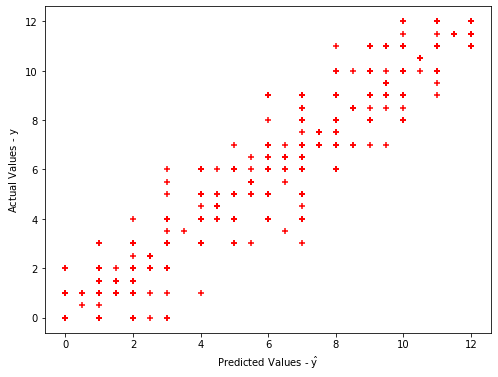

In [188]:
clf=DecisionTreeRegressor()
model = clf.fit(X_train,y_train)
predictions = model.predict(X_test)

# Plot the model
plt.figure(figsize=(8,6))
plt.scatter(predictions, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values - $y$")
plt.show()

In [190]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [191]:
regression_results(y_test,predictions)

explained_variance:  0.9905
mean_squared_log_error:  0.0067
r2:  0.9905
MAE:  0.0775
MSE:  0.1161
RMSE:  0.3407
